In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import cv2
import os
import random
import matplotlib.pyplot as plt 
import pickle
from multiprocessing import Pool, Manager, cpu_count, Lock
import pickle
import keras  
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Dropout
import keras.losses
import time
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [3]:
X_train = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/X_train.pkl','rb'))
Y_train = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/Y_train.pkl','rb'))
X_test = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/X_test.pkl','rb'))
Y_test = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/Y_test.pkl','rb'))
X_val = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/X_val.pkl','rb'))
Y_val = pickle.load(open('/content/drive/MyDrive/Miczone/fingerprint/Y_val.pkl','rb'))

In [4]:
Y_train = keras.utils.np_utils.to_categorical(Y_train)
Y_val = keras.utils.np_utils.to_categorical(Y_val)

In [5]:
nsamples, nx, ny = X_train.shape

In [6]:
X_train = X_train.reshape((nsamples,nx*ny))

In [7]:
nsamples, nx, ny = X_val.shape

In [8]:
X_val = X_val.reshape((nsamples,nx*ny))

In [9]:
nsamples, nx, ny = X_test.shape

In [10]:
X_test = X_test.reshape((nsamples,nx*ny))

In [15]:
from sklearn.decomposition import PCA
# pca = PCA().fit(X_train)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')

In [16]:
pca = PCA(n_components=10000)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10000, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X_train = pca.transform(X_train)

In [18]:
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [19]:
def scale_and_reshape_for_keras(X):
        # Calculate easier
        X = X.astype("float32") / 255.0

        # Dữ liệu input cho mô hình convolutional neural network là 1 tensor 4 chiều (N, W, H, D)
        X = X.reshape(X.shape[0], 100, 100)
        X = np.stack((X,)*3, axis=-1) 
        return X

In [20]:
X_train = scale_and_reshape_for_keras(X_train)
X_val = scale_and_reshape_for_keras(X_val)
X_test = scale_and_reshape_for_keras(X_test)

In [21]:
X_train.shape

(25331, 100, 100, 3)

In [22]:
model = Sequential()
width = 100
height = 100
classes = 7

In [23]:
shape = (width, height, 3)

In [24]:
model.add(Conv2D(16, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(258))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [25]:
 model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [26]:
 history = model.fit(X_train, Y_train, epochs=15, validation_data =(X_val,Y_val),batch_size=32,verbose = 1)

Epoch 1/15
792/792 [==============================] - 38s 24ms/step - loss: 1.4535 - accuracy: 0.4669 - val_loss: 1.4621 - val_accuracy: 0.3747
Epoch 2/15
792/792 [==============================] - 18s 23ms/step - loss: 1.3696 - accuracy: 0.4904 - val_loss: 1.4503 - val_accuracy: 0.3941
Epoch 3/15
792/792 [==============================] - 18s 23ms/step - loss: 1.3584 - accuracy: 0.4942 - val_loss: 1.4829 - val_accuracy: 0.3350
Epoch 4/15
792/792 [==============================] - 18s 23ms/step - loss: 1.3496 - accuracy: 0.4947 - val_loss: 1.4387 - val_accuracy: 0.4704
Epoch 5/15
792/792 [==============================] - 19s 23ms/step - loss: 1.3422 - accuracy: 0.4963 - val_loss: 1.4290 - val_accuracy: 0.4447
Epoch 6/15
792/792 [==============================] - 19s 24ms/step - loss: 1.3418 - accuracy: 0.4967 - val_loss: 1.4304 - val_accuracy: 0.4026
Epoch 7/15
792/792 [==============================] - 19s 24ms/step - loss: 1.3357 - accuracy: 0.5010 - val_loss: 1.4919 - val_accuracy:

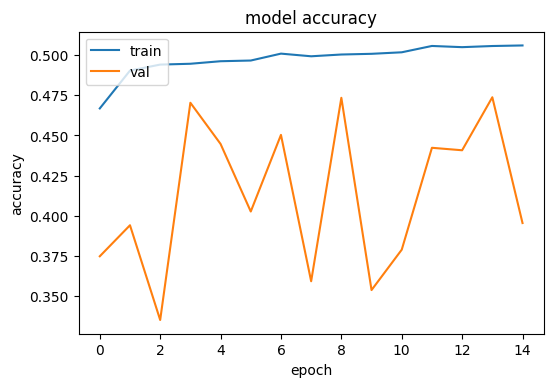

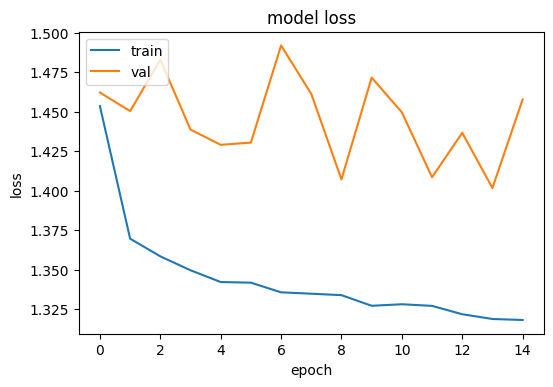

In [27]:
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()